<a href="https://colab.research.google.com/github/Swagat-modder/DA-DS-portfolio/blob/main/Uber_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# loading data into dataframe and printing first five rows
uber_data = pd.read_csv("/content/Uber Request Data.csv")
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [ ]:
# printing the dataframe information to check type and null values in each column
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [ ]:
# creating a small dataframe to identify the number of drivers and average trip they complete daily
demand_vs_supply = pd.DataFrame({'Total No. of Drivers':[uber_data['Driver id'].nunique()],
                                 'Total Demand Per Day':[uber_data['Request id'].nunique()/5],
                                'Trip_Completed_Count_Per_Day':uber_data[(uber_data['Status']=='Trip Completed')].shape[0]/5})
demand_vs_supply

,Total No. of Drivers,Total Demand Per Day,Trip_Completed_Count_Per_Day
0,300,1349.0,566.2


In [ ]:
# on average how many request each driver gets
demand_vs_supply['Total Demand Per Day']/demand_vs_supply['Total No. of Drivers']

,0
0,4.496667


In [ ]:
# printing first few row of the formatted data
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [19]:
# creating derived metrics from timestamp columns for further analysis
def convert_to_datetime(timestamp_str):
  try:
    return pd.to_datetime(timestamp_str, format='%m/%d/%Y %H:%M')
  except ValueError:
    return pd.to_datetime(timestamp_str, format='%d-%m-%Y %H:%M:%S')

uber_data['Request timestamp'] = uber_data['Request timestamp'].apply(convert_to_datetime)
uber_data['Drop timestamp'] = uber_data['Drop timestamp'].apply(convert_to_datetime)

uber_data['Request Date'] = uber_data["Request timestamp"].dt.date
uber_data['Request Time'] = uber_data["Request timestamp"].dt.time
uber_data['Drop Date'] = uber_data["Drop timestamp"].dt.date
uber_data['Drop Time'] = uber_data["Drop timestamp"].dt.time
uber_data['Request Weekday'] = uber_data['Request timestamp'].apply(lambda x: dt.datetime.strftime(x, '%A'))
uber_data['Request Hour'] = uber_data['Request timestamp'].apply(lambda x: x.hour)
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request Weekday,Request Hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11:51:00,2016-11-07,13:00:00,Monday,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17:57:00,2016-11-07,18:47:00,Monday,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:17:00,2016-12-07,09:58:00,Wednesday,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21:08:00,2016-12-07,22:03:00,Wednesday,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,2016-07-13,09:25:47,Wednesday,8


In [20]:
# counting number of null values  in request timestamp, drop timestamp and driver id
Request_timestamp_count_of_null_values = uber_data['Request timestamp'].isnull().sum()
Drop_timestamp_count_of_null_values = uber_data['Drop timestamp'].isnull().sum()
Driver_id_count_of_null_values = uber_data['Driver id'].isnull().sum()
print("Number of rows containing null values in Request timestamp:", Request_timestamp_count_of_null_values)
print("Number of rows containing null values in Drop timestamp:", Drop_timestamp_count_of_null_values)
print("Number of rows containing null values in Driver id:", Driver_id_count_of_null_values)

Number of rows containing null values in Request timestamp: 0
Number of rows containing null values in Drop timestamp: 3914
Number of rows containing null values in Driver id: 2650


In [21]:
# grouping data by status and counting number of request ids for each status type
uber_data.groupby(uber_data.Status).count()

,Request id,Pickup point,Driver id,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request Weekday,Request Hour
Status,,,,,,,,,,,
Cancelled,1264,1264,1264,1264,0,1264,1264,0,0,1264,1264
No Cars Available,2650,2650,0,2650,0,2650,2650,0,0,2650,2650
Trip Completed,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831


In [22]:
# checking whats the range of the date for which data is given to us
print("Minimum Date: ", min(uber_data['Request Date']))
print("Maximum Date: ", max(uber_data['Request Date']))

Minimum Date:  2016-07-13
Maximum Date:  2016-12-07


In [23]:
# printing all unique dates
print(uber_data['Request Date'].unique())

[datetime.date(2016, 11, 7) datetime.date(2016, 12, 7)
 datetime.date(2016, 7, 13) datetime.date(2016, 7, 14)
 datetime.date(2016, 7, 15)]


In [24]:
# grouping by driver id and status type and printing top 10 rows
uber_data_groupby_status_and_driverId = uber_data.groupby(["Driver id","Status"]).count()
uber_data_groupby_status_and_driverId.head(10)

Request id  Pickup point  Request timestamp  \
Driver id Status                                                        
1.0       Cancelled                4             4                  4   
          Trip Completed           9             9                  9   
2.0       Cancelled                4             4                  4   
          Trip Completed           9             9                  9   
3.0       Cancelled                4             4                  4   
          Trip Completed          10            10                 10   
4.0       Cancelled                5             5                  5   
          Trip Completed          10            10                 10   
5.0       Cancelled                2             2                  2   
          Trip Completed          11            11                 11   

                          Drop timestamp  Request Date  Request Time  \
Driver id Status                                                       
1.0       Cancelled                    0             4             4   
          Trip Completed               9             9             9   
2.0       Cancelled                    0             4             4   
          Trip Completed               9             9             9   
3.0       Cancelled                    0             4             4   
          Trip Completed              10            10            10   
4.0       Cancelled                    0             5             5   
          Trip Completed              10            10            10   
5.0       Cancelled                    0             2             2   
          Trip Completed              11            11            11   

                          Drop Date  Drop Time  Request Weekday  Request Hour  
Driver id Status                                                               
1.0       Cancelled               0          0                4             4  
          Trip Completed          9          9                9             9  
2.0       Cancelled               0          0                4             4  
          Trip Completed          9          9                9             9  
3.0       Cancelled               0          0                4             4  
          Trip Completed         10         10               10            10  
4.0       Cancelled               0          0                5             5  
          Trip Completed         10         10               10            10  
5.0       Cancelled               0          0                2             2  
          Trip Completed         11         11               11            11

In [25]:
# filtering the dataframe for which trip is either cancelled or no cab was available
uber_data_with_null_drop_timestamp = uber_data[uber_data["Drop timestamp"].isnull()]
uber_data_with_null_drop_timestamp.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request Weekday,Request Hour
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT,2016-07-13,06:08:41,NaT,NaT,Wednesday,6
2832,4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT,2016-07-14,17:07:58,NaT,NaT,Thursday,17
2833,5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaT,2016-07-14,20:51:37,NaT,NaT,Thursday,20
2834,5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaT,2016-07-15,10:12:40,NaT,NaT,Friday,10
2835,2347,Airport,2.0,Cancelled,2016-12-07 19:14:00,NaT,2016-12-07,19:14:00,NaT,NaT,Wednesday,19


In [26]:
# grouping by status and printing count for each status type
uber_data_with_null_drop_timestamp.groupby(uber_data_with_null_drop_timestamp.Status).count()

,Request id,Pickup point,Driver id,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request Weekday,Request Hour
Status,,,,,,,,,,,
Cancelled,1264,1264,1264,1264,0,1264,1264,0,0,1264,1264
No Cars Available,2650,2650,0,2650,0,2650,2650,0,0,2650,2650


In [27]:
# filtering dataframe for which trip was completed
uber_data_with_drop_timestamp = uber_data[~uber_data["Drop timestamp"].isnull()]
uber_data_with_drop_timestamp.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request Weekday,Request Hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11:51:00,2016-11-07,13:00:00,Monday,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17:57:00,2016-11-07,18:47:00,Monday,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:17:00,2016-12-07,09:58:00,Wednesday,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21:08:00,2016-12-07,22:03:00,Wednesday,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,2016-07-13,09:25:47,Wednesday,8


In [28]:
# grouping by status type to check count
uber_data_with_drop_timestamp.groupby(uber_data_with_drop_timestamp.Status).count()

,Request id,Pickup point,Driver id,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request Weekday,Request Hour
Status,,,,,,,,,,,
Trip Completed,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831


In [29]:
# filtering dataframe for the requests for which no cars were available
uber_data_with_no_driver_id = uber_data[uber_data["Driver id"].isnull()]
uber_data_with_no_driver_id.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request Weekday,Request Hour
4095,1362,City,NaN,No Cars Available,2016-11-07 00:02:00,NaT,2016-11-07,00:02:00,NaT,NaT,Monday,0
4096,1364,City,NaN,No Cars Available,2016-11-07 00:06:00,NaT,2016-11-07,00:06:00,NaT,NaT,Monday,0
4097,1366,City,NaN,No Cars Available,2016-11-07 00:09:00,NaT,2016-11-07,00:09:00,NaT,NaT,Monday,0
4098,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaT,2016-11-07,00:23:00,NaT,NaT,Monday,0
4099,7,Airport,NaN,No Cars Available,2016-11-07 00:30:00,NaT,2016-11-07,00:30:00,NaT,NaT,Monday,0


In [30]:
# filtering dataframe for which driver id was present, so either the trip was cancelled or completed
uber_data_with_driver_id = uber_data[~uber_data["Driver id"].isnull()]
uber_data_with_driver_id.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request Weekday,Request Hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,11:51:00,2016-11-07,13:00:00,Monday,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,17:57:00,2016-11-07,18:47:00,Monday,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,09:17:00,2016-12-07,09:58:00,Wednesday,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,21:08:00,2016-12-07,22:03:00,Wednesday,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,2016-07-13,09:25:47,Wednesday,8


In [31]:
# grouping by status to check total count of trip completed and cancelled
uber_data_with_driver_id.groupby(uber_data_with_driver_id.Status).count()

,Request id,Pickup point,Driver id,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request Weekday,Request Hour
Status,,,,,,,,,,,
Cancelled,1264,1264,1264,1264,0,1264,1264,0,0,1264,1264
Trip Completed,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831,2831


In [32]:
print("Number of rows with driver id but null Drop timestamp:", uber_data_with_driver_id["Drop timestamp"].isnull().sum())

Number of rows with driver id but null Drop timestamp: 1264


In [33]:
uber_data_with_driver_id_but_no_drop_time = uber_data_with_driver_id[uber_data_with_driver_id["Drop timestamp"].isnull()]
uber_data_with_driver_id_but_no_drop_time.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request Weekday,Request Hour
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT,2016-07-13,06:08:41,NaT,NaT,Wednesday,6
2832,4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT,2016-07-14,17:07:58,NaT,NaT,Thursday,17
2833,5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaT,2016-07-14,20:51:37,NaT,NaT,Thursday,20
2834,5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaT,2016-07-15,10:12:40,NaT,NaT,Friday,10
2835,2347,Airport,2.0,Cancelled,2016-12-07 19:14:00,NaT,2016-12-07,19:14:00,NaT,NaT,Wednesday,19


In [34]:
uber_data_with_driver_id_but_no_drop_time.groupby(uber_data_with_driver_id_but_no_drop_time.Status).count()

,Request id,Pickup point,Driver id,Request timestamp,Drop timestamp,Request Date,Request Time,Drop Date,Drop Time,Request Weekday,Request Hour
Status,,,,,,,,,,,
Cancelled,1264,1264,1264,1264,0,1264,1264,0,0,1264,1264


In [35]:
uber_data_groupby_request_date = uber_data.groupby(['Request Date', 'Status']).count()

In [36]:
uber_data_groupby_request_date

Request id  Pickup point  Driver id  \
Request Date Status                                                   
2016-07-13   Cancelled                 270           270        270   
             No Cars Available         490           490          0   
             Trip Completed            577           577        577   
2016-07-14   Cancelled                 252           252        252   
             No Cars Available         571           571          0   
             Trip Completed            530           530        530   
2016-07-15   Cancelled                 240           240        240   
             No Cars Available         580           580          0   
             Trip Completed            561           561        561   
2016-11-07   Cancelled                 262           262        262   
             No Cars Available         504           504          0   
             Trip Completed            601           601        601   
2016-12-07   Cancelled                 240           240        240   
             No Cars Available         505           505          0   
             Trip Completed            562           562        562   

                                Request timestamp  Drop timestamp  \
Request Date Status                                                 
2016-07-13   Cancelled                        270               0   
             No Cars Available                490               0   
             Trip Completed                   577             577   
2016-07-14   Cancelled                        252               0   
             No Cars Available                571               0   
             Trip Completed                   530             530   
2016-07-15   Cancelled                        240               0   
             No Cars Available                580               0   
             Trip Completed                   561             561   
2016-11-07   Cancelled                        262               0   
             No Cars Available                504               0   
             Trip Completed                   601             601   
2016-12-07   Cancelled                        240               0   
             No Cars Available                505               0   
             Trip Completed                   562             562   

                                Request Time  Drop Date  Drop Time  \
Request Date Status                                                  
2016-07-13   Cancelled                   270          0          0   
             No Cars Available           490          0          0   
             Trip Completed              577        577        577   
2016-07-14   Cancelled                   252          0          0   
             No Cars Available           571          0          0   
             Trip Completed              530        530        530   
2016-07-15   Cancelled                   240          0          0   
             No Cars Available           580          0          0   
             Trip Completed              561        561        561   
2016-11-07   Cancelled                   262          0          0   
             No Cars Available           504          0          0   
             Trip Completed              601        601        601   
2016-12-07   Cancelled                   240          0          0   
             No Cars Available           505          0          0   
             Trip Completed              562        562        562   

                                Request Weekday  Request Hour  
Request Date Status                                            
2016-07-13   Cancelled                      270           270  
             No Cars Available              490           490  
             Trip Completed                 577           577  
2016-07-14   Cancelled                      252           252  
             No Cars Available              571           571  
           

In [37]:
x =uber_data.groupby('Request Date').count()
x.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Time,Drop Date,Drop Time,Request Weekday,Request Hour
Request Date,,,,,,,,,,,
2016-07-13,1337,1337,847,1337,1337,577,1337,577,577,1337,1337
2016-07-14,1353,1353,782,1353,1353,530,1353,530,530,1353,1353
2016-07-15,1381,1381,801,1381,1381,561,1381,561,561,1381,1381
2016-11-07,1367,1367,863,1367,1367,601,1367,601,601,1367,1367
2016-12-07,1307,1307,802,1307,1307,562,1307,562,562,1307,1307


<Axes: title={'center': 'Trip Status'}, xlabel='count', ylabel='Status'>

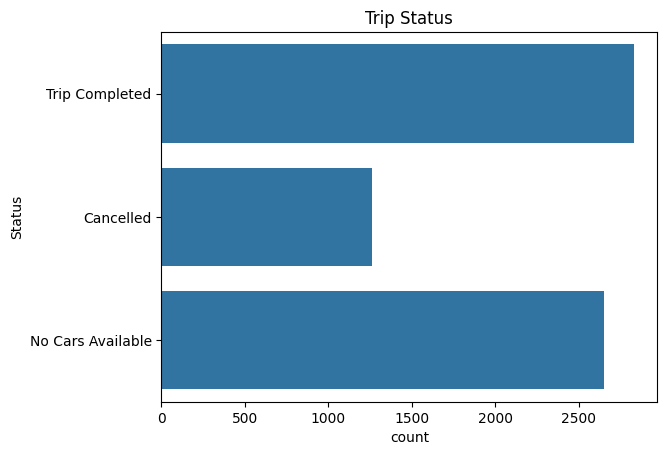

In [38]:
# plotting graph for trip status
plt.title('Trip Status')
sns.countplot(uber_data['Status'])

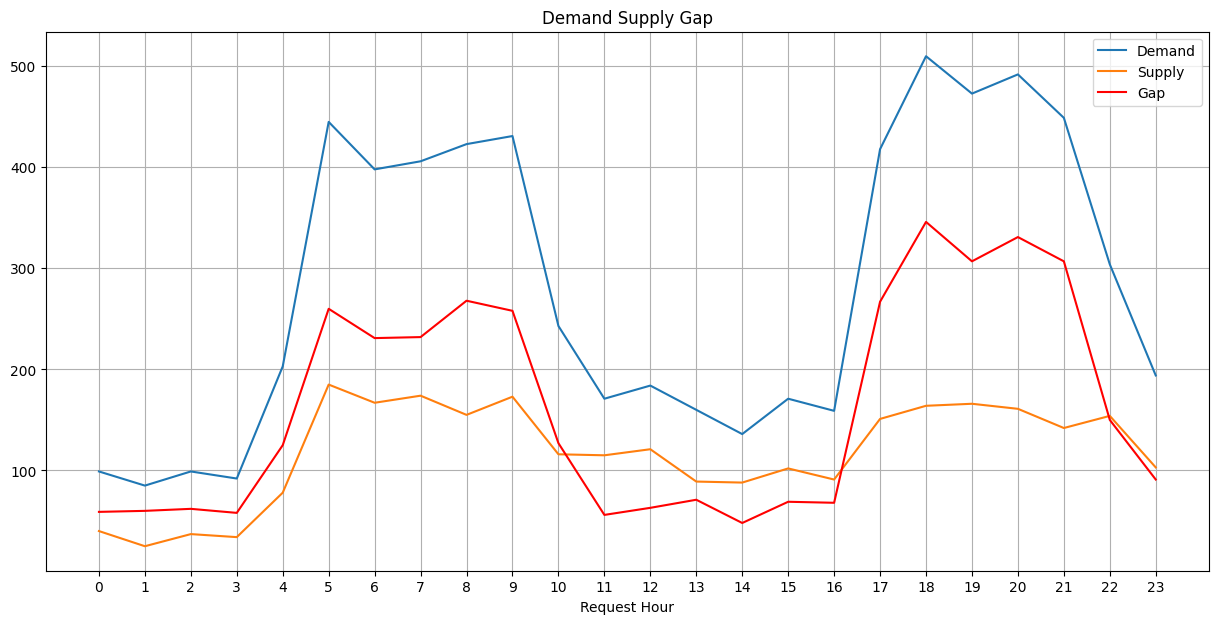

In [39]:
#plot data to show demand supply gap
fig, ax = plt.subplots(figsize=(15,7))
plt.xticks([i for i in range(0,24)])
uber_data.groupby(uber_data['Request Hour']).count()['Request id'].plot(ax=ax, label='Demand')
uber_data[uber_data['Status']=="Trip Completed"].groupby(uber_data[uber_data['Status']=="Trip Completed"]['Request Hour']).count()['Request id'].plot(ax=ax, label='Supply')
(uber_data.groupby(uber_data['Request Hour']).count()['Request id'] - uber_data[uber_data['Status']=="Trip Completed"].groupby(uber_data[uber_data['Status']=="Trip Completed"]['Request Hour']).count()['Request id']).plot(ax=ax, label='Gap', c='red')
plt.grid("on")
plt.title("Demand Supply Gap")
plt.legend()

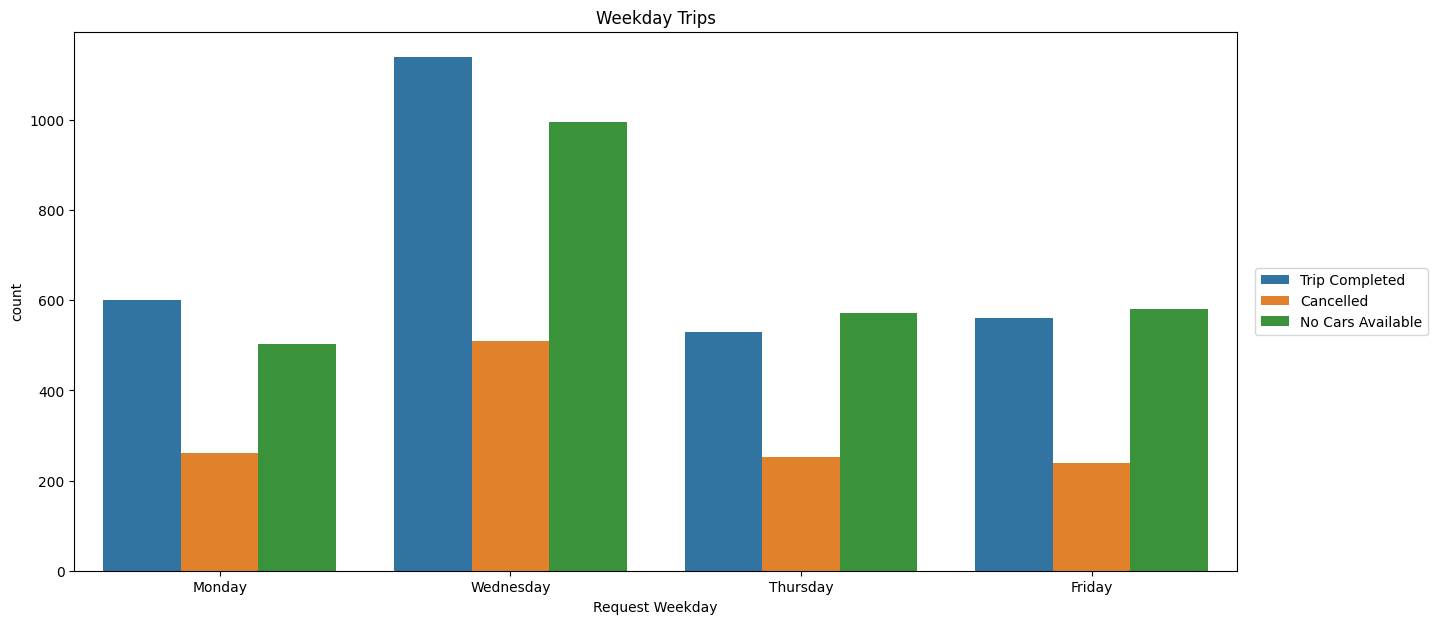

In [41]:
# plot data to show status count for each day
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Weekday Trips")
ax = sns.countplot(x='Request Weekday',hue='Status',data=uber_data)
plt.legend(bbox_to_anchor=(1.17, 0.5), loc='right')

In [42]:
uber_data_heat = uber_data.groupby(['Request Weekday', 'Request Hour']).size().reset_index()
uber_data_heat.columns = ['Request Weekday', 'Request Hour', 'Hourly Count']
uber_data_heat.head()

,Request Weekday,Request Hour,Hourly Count
0,Friday,0,21
1,Friday,1,19
2,Friday,2,21
3,Friday,3,19
4,Friday,4,37


In [46]:
uber_data_city = uber_data[uber_data['Pickup point']=="City"]
uber_data_airport = uber_data[uber_data['Pickup point']=="Airport"]

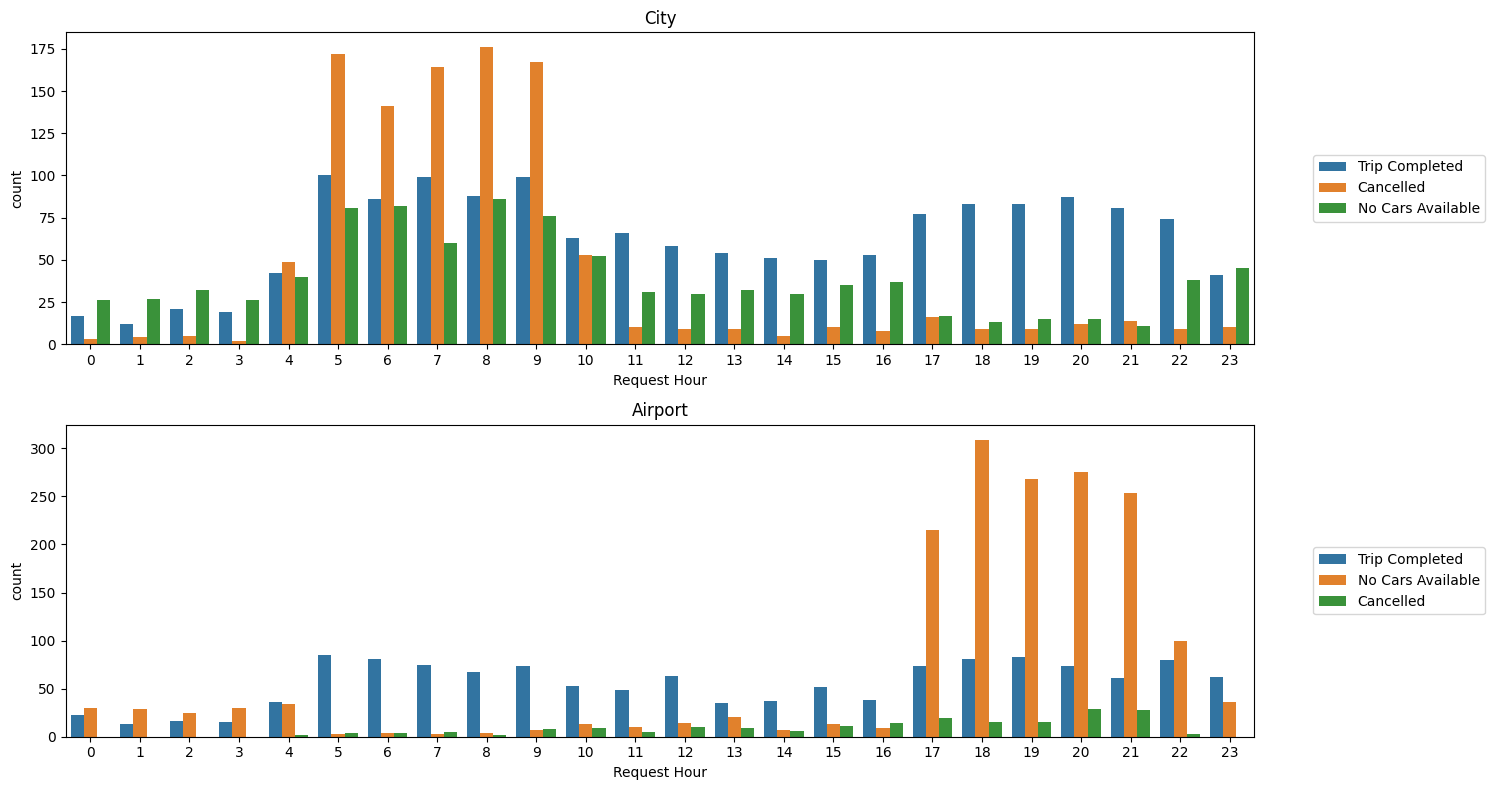

In [47]:
# plot data to get count of status for airport to city and city to airport trips
f = plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.title("City")
sns.countplot(x='Request Hour',hue='Status',data=uber_data_city)
plt.legend(bbox_to_anchor=(1.20, 0.5), loc='right')
plt.subplot(2,1,2)
plt.title("Airport")
sns.countplot(x='Request Hour',hue='Status',data=uber_data_airport)
plt.legend(bbox_to_anchor=(1.20, 0.5), loc='right')
plt.tight_layout()

<Axes: title={'center': 'Peak-Hours Between City and Airport'}, xlabel='Request Hour', ylabel='count'>

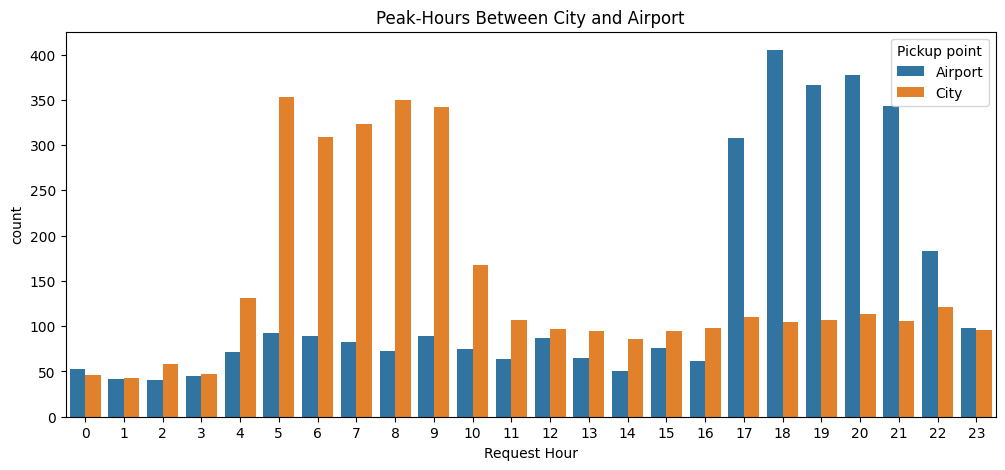

In [48]:
# plot hourly data to visualize peakhours from city to airport and airport to city trip
plt.subplots(figsize=(12,5))
plt.title("Peak-Hours Between City and Airport")
sns.countplot(x='Request Hour',hue='Pickup point',data=uber_data)

## Dividing data into multiple time slots

In [49]:
# Early Morning - timeslot 00:00:00 to 3:59:59
uber_data_early_morning = pd.DataFrame(uber_data[(uber_data['Request Hour']<4)]).reset_index()

# Early Morning City
uber_data_early_morning_city = uber_data_early_morning[(uber_data_early_morning['Pickup point']=='City')]
uber_data_early_morning_city_perc = (uber_data_early_morning_city.groupby(['Status']).index.count()
                                     /len(uber_data_early_morning_city)*100).reset_index()

# Early Morning Airport
uber_data_early_morning_airport = uber_data_early_morning[(uber_data_early_morning['Pickup point']=='Airport')]
uber_data_early_morning_airport_perc = (uber_data_early_morning_airport.groupby(['Status']).index.count()
                                        /len(uber_data_early_morning_airport)*100).reset_index()

In [50]:
uber_data_early_morning_airport_perc.loc[-1] = ['Cancelled', 0]  # adding a row
uber_data_early_morning_airport_perc.index = uber_data_early_morning_airport_perc.index + 1  # shifting index
uber_data_early_morning_airport_perc.sort_index(inplace=True)

In [51]:
# Mid Morning - timeslot 04:00:00 to 7:59:59
uber_data_mid_morning = pd.DataFrame(uber_data[(uber_data['Request Hour']>=4) & (uber_data['Request Hour']<8)]).reset_index()

# Mid Morning City
uber_data_mid_morning_city = uber_data_mid_morning[(uber_data_mid_morning['Pickup point']=='City')]
uber_data_mid_morning_city_perc = (uber_data_mid_morning_city.groupby(['Status']).index.count()
                                     /len(uber_data_mid_morning_city)*100).reset_index()

# Mid Morning Airport
uber_data_mid_morning_airport = uber_data_mid_morning[(uber_data_mid_morning['Pickup point']=='Airport')]
uber_data_mid_morning_airport_perc = (uber_data_mid_morning_airport.groupby(['Status']).index.count()
                                        /len(uber_data_mid_morning_airport)*100).reset_index()

In [52]:
# Late Morning - timeslot 08:00:00 to 11:59:59
uber_data_late_morning = pd.DataFrame(uber_data[(uber_data['Request Hour']>=8) & (uber_data['Request Hour']<12)]).reset_index()

# Late Morning City
uber_data_late_morning_city = uber_data_late_morning[(uber_data_late_morning['Pickup point']=='City')]
uber_data_late_morning_city_perc = (uber_data_late_morning_city.groupby(['Status']).index.count()
                                     /len(uber_data_late_morning_city)*100).reset_index()

# Late Morning Airport
uber_data_late_morning_airport = uber_data_late_morning[(uber_data_late_morning['Pickup point']=='Airport')]
uber_data_late_morning_airport_perc = (uber_data_late_morning_airport.groupby(['Status']).index.count()
                                        /len(uber_data_late_morning_airport)*100).reset_index()

In [53]:
# Afternoon - timeslot 12:00:00 to 15:59:59
uber_data_afternoon = pd.DataFrame(uber_data[(uber_data['Request Hour']>=12) & (uber_data['Request Hour']<16)]).reset_index()

# Afternoon City
uber_data_afternoon_city = uber_data_afternoon[(uber_data_afternoon['Pickup point']=='City')]
uber_data_afternoon_city_perc = (uber_data_afternoon_city.groupby(['Status']).index.count()
                                     /len(uber_data_afternoon_city)*100).reset_index()

# Afternoon Airport
uber_data_afternoon_airport = uber_data_afternoon[(uber_data_afternoon['Pickup point']=='Airport')]
uber_data_afternoon_airport_perc = (uber_data_afternoon_airport.groupby(['Status']).index.count()
                                        /len(uber_data_afternoon_airport)*100).reset_index()

In [54]:
# Evening - timeslot 16:00:00 to 19:59:59
uber_data_evening = pd.DataFrame(uber_data[(uber_data['Request Hour']>=16) & (uber_data['Request Hour']<20)]).reset_index()

# Evening City
uber_data_evening_city = uber_data_evening[(uber_data_evening['Pickup point']=='City')]
uber_data_evening_city_perc = (uber_data_evening_city.groupby(['Status']).index.count()
                                     /len(uber_data_evening_city)*100).reset_index()

# Evening Airport
uber_data_evening_airport = uber_data_evening[(uber_data_evening['Pickup point']=='Airport')]
uber_data_evening_airport_perc = (uber_data_evening_airport.groupby(['Status']).index.count()
                                        /len(uber_data_evening_airport)*100).reset_index()

In [55]:
# Night - timeslot 20:00:00 to 23:59:59
uber_data_night = pd.DataFrame(uber_data[(uber_data['Request Hour']>=20)]).reset_index()

# Night City
uber_data_night_city = uber_data_night[(uber_data_night['Pickup point']=='City')]
uber_data_night_city_perc = (uber_data_night_city.groupby(['Status']).index.count()
                                     /len(uber_data_night_city)*100).reset_index()

# Night Airport
uber_data_night_airport = uber_data_night[(uber_data_night['Pickup point']=='Airport')]
uber_data_night_airport_perc = (uber_data_night_airport.groupby(['Status']).index.count()
                                        /len(uber_data_night_airport)*100).reset_index()

<ipython-input-56-0af0c0da19a5>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_yticklabels([0,20,40,60,80,100])
<ipython-input-56-0af0c0da19a5>:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_yticklabels([100, 80, 60, 40, 20, 0])
<ipython-input-56-0af0c0da19a5>:145: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  l.legend(loc='center right', bbox_to_anchor=(2, 1), ncol=1)


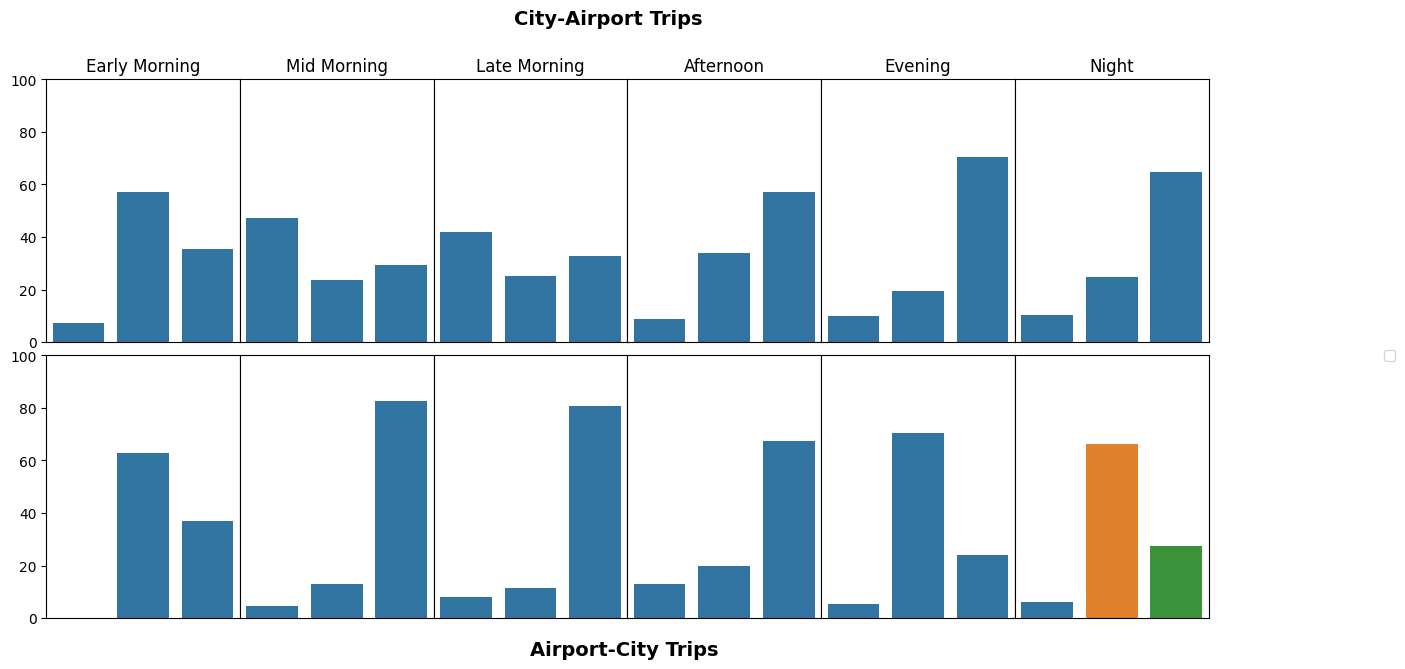

In [56]:
# ploting data for each time slots for city and airport trips

f = plt.figure(figsize=(15,7))

## City Data
plt.suptitle('City-Airport Trips', fontsize=14, fontweight='bold')
plt.subplot(2,6,1)
a = sns.barplot(x='Status', y='index',data=uber_data_early_morning_city_perc)
a.set_ylim(0, 100)
# a.axis("off")
a.set_xticklabels([])
a.set_yticklabels([0,20,40,60,80,100])
a.set_xlabel('')
a.set_ylabel('')
a.set_xticks([])
a.set_yticks([0,20,40,60,80,100])
a.set_title('Early Morning')
plt.ylim([0,100])
plt.subplot(2,6,2)
b = sns.barplot(x='Status', y='index',data=uber_data_mid_morning_city_perc)
b.set_ylim(0, 100)
# b.axis("off")
b.set_xticklabels([])
b.set_yticklabels([])
b.set_xlabel('')
b.set_ylabel('')
b.set_xticks([])
b.set_yticks([])
b.set_title('Mid Morning')
plt.subplot(2,6,3)
c = sns.barplot(x='Status', y='index',data=uber_data_late_morning_city_perc)
c.set_ylim(0, 100)
# c.axis("off")
c.set_xticklabels([])
c.set_yticklabels([])
c.set_xlabel('')
c.set_ylabel('')
c.set_xticks([])
c.set_yticks([])
c.set_title('Late Morning')
plt.subplot(2,6,4)
d = sns.barplot(x='Status', y='index',data=uber_data_afternoon_city_perc)
d.set_ylim(0, 100)
# d.axis("off")
d.set_xticklabels([])
d.set_yticklabels([])
d.set_xlabel('')
d.set_ylabel('')
d.set_xticks([])
d.set_yticks([])
d.set_title('Afternoon')
plt.subplot(2,6,5)
e = sns.barplot(x='Status', y='index',data=uber_data_evening_city_perc)
e.set_ylim(0, 100)
e.set_xticklabels([])
e.set_yticklabels([])
e.set_xlabel('')
e.set_ylabel('')
e.set_xticks([])
e.set_yticks([])
e.set_title('Evening')
plt.subplot(2,6,6)
f = sns.barplot(x='Status', y='index',data=uber_data_night_city_perc)
f.set_ylim(0, 100)
f.set_xticklabels([])
f.set_yticklabels([])
f.set_xlabel('')
f.set_ylabel('')
f.set_xticks([])
f.set_yticks([])
f.set_title('Night')


## Airport-City Data
# plt.suptitle("Airport")
plt.subplot(2,6,7)
g = sns.barplot(x='Status', y='index',data=uber_data_early_morning_airport_perc)
g.set_ylim(100,0)
# g.axis("off")
g.set_xticklabels([])
g.set_yticklabels([100, 80, 60, 40, 20, 0])
g.set_xlabel('')
g.set_ylabel('')
g.set_xticks([])
g.set_yticks([100, 80, 60, 40, 20, 0])
# g.set_title('Early Morning')
plt.ylim([0,100])
plt.subplot(2,6,8)
h = sns.barplot(x='Status', y='index',data=uber_data_mid_morning_airport_perc)
h.set_ylim(0, 100)
# h.axis("off")
h.set_xticklabels([])
h.set_yticklabels([])
h.set_xlabel('')
h.set_ylabel('')
h.set_xticks([])
h.set_yticks([])
# h.set_title('Mid Morning')
plt.subplot(2,6,9)
i = sns.barplot(x='Status', y='index',data=uber_data_late_morning_airport_perc)
i.set_ylim(0, 100)
# i.axis("off")
i.set_xticklabels([])
i.set_yticklabels([])
i.set_xlabel('')
i.set_ylabel('')
i.set_xticks([])
i.set_yticks([])
# i.set_title('Late Morning')
plt.subplot(2,6,10)
j = sns.barplot(x='Status', y='index',data=uber_data_afternoon_airport_perc)
j.set_ylim(0, 100)
# j.axis("off")
j.set_xticklabels([])
j.set_yticklabels([])
j.set_xlabel('')
j.set_ylabel('')
j.set_xticks([])
j.set_yticks([])
# j.set_title('Afternoon')
plt.subplot(2,6,11)
k = sns.barplot(x='Status', y='index',data=uber_data_evening_airport_perc)
k.set_ylim(0, 100)
k.set_xticklabels([])
k.set_yticklabels([])
k.set_xlabel('')
k.set_ylabel('')
k.set_xticks([])
k.set_yticks([])
# k.set_title('Evening')
plt.subplot(2,6,12)
l = sns.barplot(x='Status', y='index', hue='Status', dodge=False, data=uber_data_night_airport_perc)
l.set_ylim(0, 100)
l.set_xticklabels([])
l.set_yticklabels([])
l.set_xlabel('')
l.set_ylabel('')
l.set_xticks([])
l.set_yticks([])
# l.legend(uber_data_night_airport_perc['Status'])
# l.set_title('Night')
# handles, labels = l.get_legend_handles_labels()
# labels = ['Cancelled','No Cars Available', 'Trip Completed']
# plt.legend(handles, labels, loc='upper center')
l.legend(loc='center right', bbox_to_anchor=(2, 1), ncol=1)
plt.text(-8, -14, "Airport-City Trips", fontsize=14, fontweight='bold')
plt.subplots_adjust(wspace=0, hspace=0.05)